In this challenge, you will predict healthcare costs using a regression algorithm.

You are given a dataset that contains information about different people including their healthcare costs. Use the data to predict healthcare costs based on new data.

The first two cells of this notebook import libraries and the data.

Make sure to convert categorical data to numbers. Use 80% of the data as the train_dataset and 20% of the data as the test_dataset.

pop off the "expenses" column from these datasets to create new datasets called train_labels and test_labels. Use these labels when training your model.

Create a model and train it with the train_dataset. Run the final cell in this notebook to check your model. The final cell will use the unseen test_dataset to check how well the model generalizes.

To pass the challenge, model.evaluate must return a Mean Absolute Error of under 3500. This means it predicts health care costs correctly within $3500.

The final cell will also predict expenses using the test_dataset and graph the results.



In [1]:
# Import libraries. You may or may not use all of these.
%pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#try:
  # %tensorflow_version only exists in Colab.
#  %tensorflow_version 2.x
#except Exception:
#  pass
#import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

Note: you may need to restart the kernel to use updated packages.


2024-11-28 11:10:41.871986: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
# Import data
#!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [20]:
#Make sure to convert categorical data to numbers. 
dataset.info()

dataset["sex"] = dataset["sex"].astype("category")  #See https://saturncloud.io/blog/how-to-convert-categorical-data-to-numerical-data-with-pandas/
dataset["sex_encoded"] = dataset["sex"].cat.codes

dataset["smoker"] = dataset["smoker"].astype("category")  
dataset["smoker_encoded"] = dataset["smoker"].cat.codes

dataset["region"] = dataset["region"].astype("category")  
dataset["region_encoded"] = dataset["region"].cat.codes

dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,expenses,sex_encoded,smoker_encoded,region_encoded
0,19,female,27.9,0,yes,southwest,16884.92,0,1,3
1,18,male,33.8,1,no,southeast,1725.55,1,0,2
2,28,male,33.0,3,no,southeast,4449.46,1,0,2
3,33,male,22.7,0,no,northwest,21984.47,1,0,1
4,32,male,28.9,0,no,northwest,3866.86,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55,1,0,1
1334,18,female,31.9,0,no,northeast,2205.98,0,0,0
1335,18,female,36.9,0,no,southeast,1629.83,0,0,2
1336,21,female,25.8,0,no,southwest,2007.95,0,0,3


In [22]:
dataset = dataset.drop(columns=["sex", "smoker", "region"])

print(dataset)

#Use 80% of the data as the train_dataset and 20% of the data as the test_dataset.

# Using numpy.random.rand() Method.
msk = np.random.rand(len(dataset)) < 0.8 #See https://sparkbyexamples.com/pandas/pandas-create-test-and-train-samples-from-dataframe/
train_dataset = dataset[msk]
test_dataset = dataset[~msk]

print("train length: " + str(len(train_dataset)))
print("test length: " + str(len(test_dataset)))

KeyError: "['sex', 'smoker', 'region'] not found in axis"

In [23]:
#pop off the "expenses" column from these datasets to create new datasets called train_labels 
# and test_labels. Use these labels when training your model.


train_labels = train_dataset.pop("expenses")

test_labels = test_dataset.pop("expenses")

In [ ]:
#Create a model and train it with the train_dataset. Run the final cell in this notebook to check your model. 
# The final cell will use the unseen test_dataset to check how well the model generalizes.

normalizer = keras.layers.Normalization(axis=-1) #See https://www.tensorflow.org/tutorials/keras/regression

normalizer.adapt(np.array(train_dataset))

model = keras.Sequential([
    normalizer,
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"), #https://keras.io/api/layers/activations/
    layers.Dense(units=1)
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.1),
    loss="mean_absolute_error", metrics=["mean_absolute_error", "mean_squared_error"])

#See https://www.tensorflow.org/tutorials/keras/regression
history = model.fit(
    train_dataset,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

In [49]:
hist = pd.DataFrame(history.history) #See https://www.tensorflow.org/tutorials/keras/regression
hist["epoch"] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
95,1683.382324,1683.382324,21032376.0,2130.951172,2130.951172,22267942.0,95
96,1709.794556,1709.794556,21391230.0,1916.726807,1916.726807,21871530.0,96
97,1632.896484,1632.896484,20927262.0,1966.372681,1966.372681,21749530.0,97
98,1691.550903,1691.550903,21007510.0,2205.887695,2205.887695,23481408.0,98
99,1683.811523,1683.811523,21547152.0,1957.744751,1957.744751,21943984.0,99


8/8 - 0s - 4ms/step - loss: 1857.2015 - mean_absolute_error: 1857.2015 - mean_squared_error: 26098904.0000
Testing set Mean Abs Error: 1857.20 expenses
You passed the challenge. Great job!
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


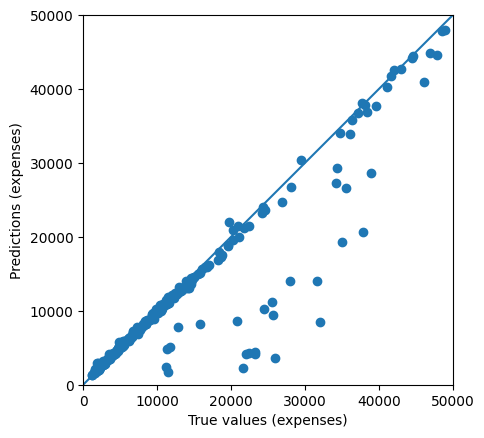

In [47]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)